In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

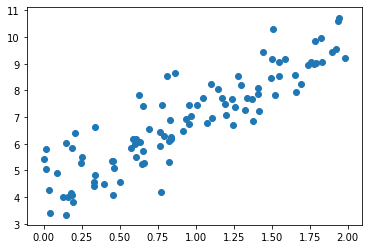

In [23]:
import numpy as np
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
plt.scatter(X, y)

In [24]:
X_b = np.c_[np.ones(shape = (X.shape)), X]
print(X_b.shape)

(100, 2)


In [25]:
theta = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y
theta

array([[4.2586609 ],
       [2.78854766]])

In [26]:
## Predictions
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones(shape = X_new.shape), X_new]
y_predict = X_new_b@theta
y_predict

array([[4.2586609 ],
       [9.83575621]])

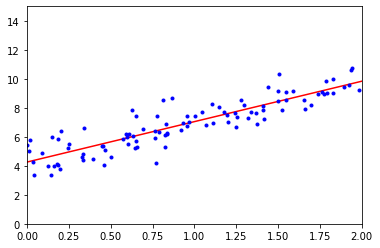

In [27]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [28]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_b, y)
print(lin_reg.intercept_)
print(lin_reg.coef_)
lin_reg.predict(X_new_b)

[4.2586609]
[[0.         2.78854766]]


array([[4.2586609 ],
       [9.83575621]])

In [32]:
np.linalg.pinv(X_b).dot(y) # This is direct y = theta * x or theta = y*X^(-1)

array([[4.2586609 ],
       [2.78854766]])

In [35]:
np.linalg.svd(X_b)

(array([[-0.12527159, -0.06702535, -0.09991574, ..., -0.0999759 ,
         -0.10003016, -0.09997317],
        [-0.10138123,  0.01056155,  0.08321101, ...,  0.01731308,
         -0.04213167,  0.02030357],
        [-0.07111126,  0.10886706,  0.98248758, ..., -0.01149998,
         -0.00607631, -0.01177282],
        ...,
        [-0.09050224,  0.04589242, -0.01149451, ...,  0.99022152,
         -0.00823051, -0.00985636],
        [-0.10799433, -0.01091532, -0.00606591, ..., -0.00822557,
          0.98982625, -0.00812757],
        [-0.08962227,  0.04875024, -0.0117676 , ..., -0.00985661,
         -0.00813275,  0.99005667]]),
 array([14.28294771,  3.95996876]),
 array([[-0.66913255, -0.74314307],
        [ 0.74314307, -0.66913255]]))

In [34]:
# sklearn is based on this least sqaures estimate
theta, residuals, rank, s = np.linalg.lstsq(X_b, y)
print(theta)

[[4.2586609 ]
 [2.78854766]]


### Gradiet Descent

#### Batch or Full Gradient Descent

In [65]:
eta = 0.1 # learning rate
n_iterations = 1000
m = 100
theta = np.random.randn(2,1) # random initialization
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
theta

array([[4.2586609 ],
       [2.78854766]])

In [66]:
eta = 0.2
n_iterations = 1000
m = 100

theta = np.zeros((2,1))
for i in range(n_iterations):
    gradients = -2/m*X_b.T @ (y - X_b @ theta)
    theta = theta - eta*gradients
theta

array([[4.2586609 ],
       [2.78854766]])

#### Stochastic Gradient Descent

In [89]:
n_epochs = 50
t0, t1 = 5, 50
n = len(X_b)
def learning_schedule(t):
    return t0/(t + t1)

theta = np.random.randn(2,1)

for j in range(n_epochs):
    for i in range(n):
        X_bi = X_b[i]
        yi = y[i]
        grad = -2*X_bi.T * (yi - X_bi @ theta)  # Note dont divide by n
        eta = learning_schedule(j*n + i) # learning rate tweaked
        theta = theta - eta*grad.reshape(-1,1)
print(theta)

[[4.25590801]
 [2.79154537]]


In [100]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter = 1000, penalty = None, tol = 1e-3, eta0= 0.1)
sgd_reg.fit(X, y)
print(sgd_reg.intercept_, sgd_reg.coef_)

[4.20294315] [2.77750834]


## Polynomial Regression

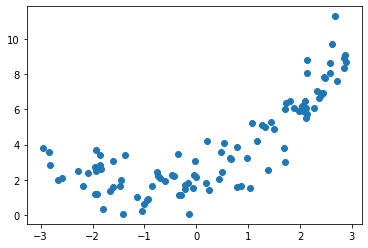

In [160]:
# Created target using known poly features
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)
plt.scatter(X, y)

In [161]:
# Generate polynomial features which can fit target
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree = 2, include_bias = False)
X_poly = poly_features.fit_transform(X)
print(X[0])
X_poly[0]

[-2.81479675]


array([-2.81479675,  7.92308072])

In [162]:
from sklearn.linear_model import LinearRegression
lin_reg.fit(X_poly, y)
print(lin_reg.intercept_, lin_reg.coef_)
y_pred = lin_reg.predict(X_poly)

# True values are 2 + 1*X + 0.5*X2

[2.0599665] [[1.01003042 0.50988936]]


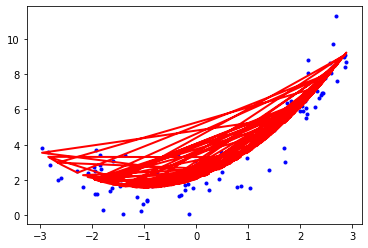

In [163]:
plt.plot(X, y, "b.")
plt.plot(X, y_pred, "r-", linewidth=2, label="Predictions")

In [125]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.axis([0, 100, 0, 3])

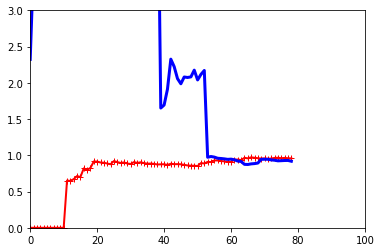

In [126]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

polynomial_regression = Pipeline([
    ("polynomial_features",  PolynomialFeatures(degree = 10, include_bias = False)),
    ("fit_model", LinearRegression())
])
plot_learning_curves(polynomial_regression, X, y)

## Regularization

In [129]:
# Ridge
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha = 1, solver = "cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[5.21910454]])

In [130]:
sgd_reg = SGDRegressor(penalty = "l2")
sgd_reg.fit(X, y)
sgd_reg.predict([[1.5]])

array([5.20186829])

In [132]:
# Lasso
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha = 0)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([5.22300733])

In [134]:
sgd_reg = SGDRegressor(penalty = "l1")
sgd_reg.fit(X, y)
sgd_reg.predict([[1.5]])

array([5.20806151])

In [135]:
# Elastic Net
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha = 0.1, l1_ratio = 0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([5.18282177])

## Early Stopping

In [164]:
from sklearn.base import clone
from copy import deepcopy

from sklearn.preprocessing import StandardScaler

poly_scaler = Pipeline([
    ("polynomial_features", PolynomialFeatures(degree = 3, include_bias = False)),
    ("scaler", StandardScaler())
])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_test_poly_scaled = poly_scaler.transform(X_test)

sgd_reg = SGDRegressor(penalty = None, warm_start = True, max_iter = 1,
tol = -np.infty, eta0 = 0.0005)

min_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(100000):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_val_predict = sgd_reg.predict(X_test_poly_scaled)
    val_error = mean_squared_error(y_val_predict, y_test)
    if val_error < min_val_error:
        best_epoch = epoch
        min_val_error = val_error
        best_model = deepcopy(sgd_reg)

In [165]:
best_epoch

29590

In [166]:
best_model

SGDRegressor(eta0=0.0005, max_iter=1, penalty=None, tol=-inf, warm_start=True)

# Logistic Regression

In [154]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())
['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']
X = iris["data"][:, 3:] # petal width
y = (iris["target"] == 2).astype(np.int)

In [156]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression()

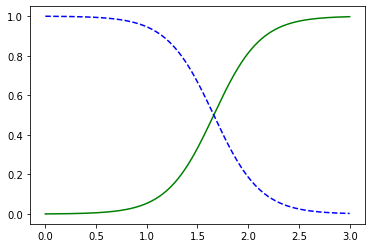

In [158]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris virginica")

In [169]:
## Softmax Regression

X = iris["data"][:, (2, 3)] # petal length, petal width
y = iris["target"]

softmax_reg = LogisticRegression(multi_class= "multinomial", solver= 'lbfgs', C = 10)
softmax_reg.fit(X, y)
softmax_reg.predict([[5, 2]])

array([2])

In [170]:
softmax_reg.predict_proba([[5, 2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])